In [115]:
import networkx as nx
import numpy as np
import pandas as pd

from IPython.display import SVG 
from sknetwork.visualization import svg_graph 
from sknetwork.data import Bunch 
from sknetwork.ranking import PageRank 

In [116]:
def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5): 

    adjacency = nx.to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format='csr') 

    names = np.array(list(G.nodes())) 

    graph = Bunch() 
    graph.adjacency = adjacency 
    graph.names = np.array(names) 

    pagerank = PageRank() 

    scores = pagerank.fit_transform(adjacency) 

    if show_names: 
        
        image = svg_graph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width) 

    else: 

        image = svg_graph(graph.adjacency, node_size=node_size, width=700, height=500, scores = scores, edge_width=edge_width) 

    return SVG(image) 

In [117]:
data = r'data/network_analysis_edgelist.csv'

df = pd.read_csv(data)
df.head()

,source,target
0,network science,Network science
1,network science,Hub (network science)
2,network science,Network theory
3,network science,National Science Foundation Network
4,network science,Social network


In [118]:
G = nx.from_pandas_edgelist(df)

# drop the seed nodes; we will have proper names from pages found
seed_nodes = ['network science', 'social network analysis', 'graph theory', 'causal inference']
G.remove_nodes_from(seed_nodes)

In [119]:
print(nx.info(G))

Graph with 9204 nodes and 14140 edges


In [78]:
# this is network analysis network without labels

draw_graph(G, node_size=1, show_names=False, edge_width=0.1)

# Egocentric Network Analysis

As the above visualization shows, this is a complex network. For knowledge discovery, we should use Egocentric Network Analysis to "zoom in" on nodes of interest. Any node can be looked at, but I am going to programmatically do this, in this notebook, showing only the top twenty nodes, according to page rank.

# PageRank - Identify Nodes of Interest

In [120]:
page_rank = nx.pagerank(G)

pr_df = pd.DataFrame().from_dict(page_rank, orient='index')
pr_df.columns = ['page_rank']
pr_df.sort_values('page_rank', ascending=False, inplace=True)
pr_df.head(10)

,page_rank
Glossary of graph theory,0.001414
Computer network,0.000724
Graph (discrete mathematics),0.000689
Internet,0.000670
History of the Internet,0.000643
Social media,0.000621
List of statistics articles,0.000617
Logic,0.000615
Social network,0.000611
Graph theory,0.000609


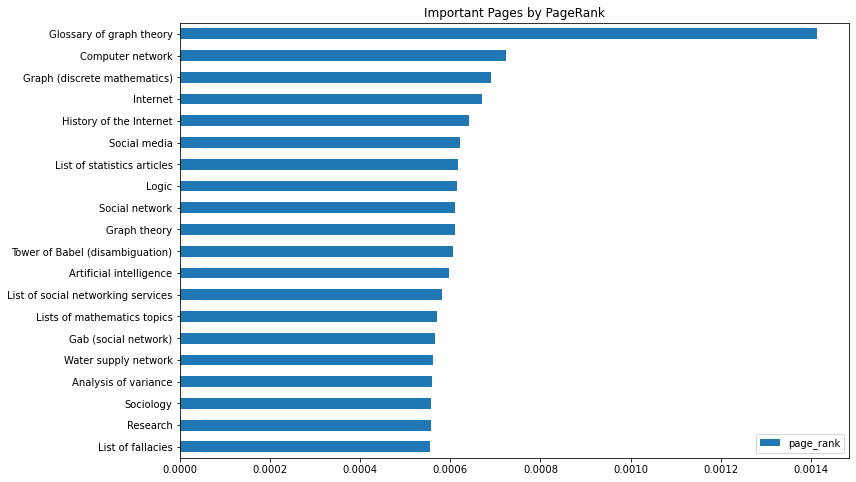

In [121]:
title = 'Important Pages by PageRank'

pr_df.head(20).plot.barh(figsize=(12,8), title=title).invert_yaxis()

# Egocentric Network Analysis
Next, let's look at the Ego Graphs for each of the top ten characters found by PageRank. Before visualizing and inspecting the Ego Graphs, let's create a Python list so that we can more easily look through them without explicitely typing their names.

In [122]:
top_nodes = pr_df.head(20).index.values

In [123]:
top_nodes[0]

'Glossary of graph theory'

Now we are all set to start looking through them, in order of importance.

## Top Node Ego Networks
Unlike last time, I am not going to drop the center node or write about findings. This is purely discovery. Remember two things:
- The center node is known as the 'ego' node. It is the node being looked up.
- The other nodes are known as 'alter' nodes. They are connected to the ego node, and sometimes with each other.

Pay close attention to the alter nodes that link to other alter nodes. These are interesting relationships, and you can see subcommunities in the ego network. Think about what you are seeing. What does this tell you?

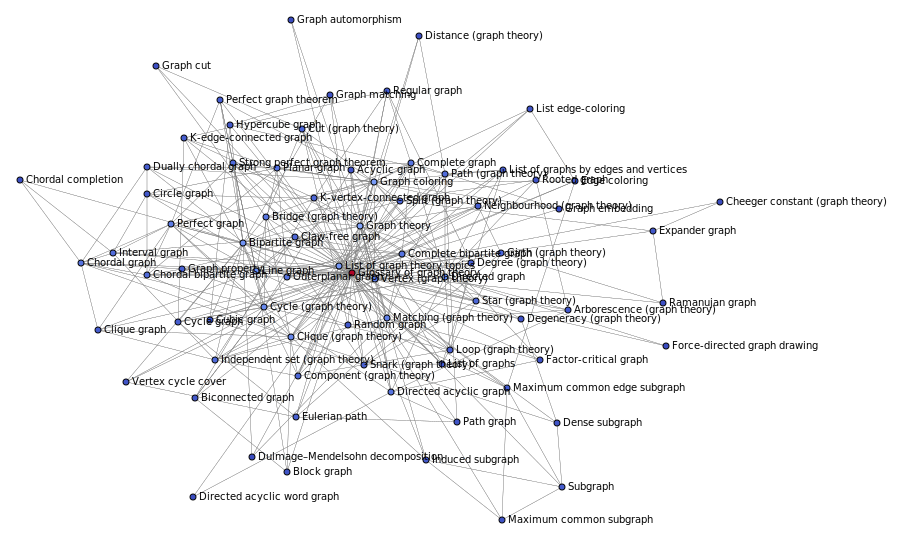

In [124]:
ego = top_nodes[0]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

In [125]:
# you can look at the nodes in the ego network this way, to find interesting topics

nodes = sorted(G_ego.nodes)
nodes

['Acyclic graph',
 'Arborescence (graph theory)',
 'Biconnected graph',
 'Bipartite graph',
 'Block graph',
 'Bridge (graph theory)',
 'Cheeger constant (graph theory)',
 'Chordal bipartite graph',
 'Chordal completion',
 'Chordal graph',
 'Circle graph',
 'Claw-free graph',
 'Clique (graph theory)',
 'Clique graph',
 'Complete bipartite graph',
 'Complete graph',
 'Component (graph theory)',
 'Cubic graph',
 'Cut (graph theory)',
 'Cycle (graph theory)',
 'Cycle graph',
 'Degeneracy (graph theory)',
 'Degree (graph theory)',
 'Dense subgraph',
 'Directed acyclic graph',
 'Directed acyclic word graph',
 'Directed graph',
 'Distance (graph theory)',
 'Dually chordal graph',
 'Dulmage–Mendelsohn decomposition',
 'Edge coloring',
 'Eulerian path',
 'Expander graph',
 'Factor-critical graph',
 'Force-directed graph drawing',
 'Girth (graph theory)',
 'Glossary of graph theory',
 'Graph automorphism',
 'Graph coloring',
 'Graph cut',
 'Graph embedding',
 'Graph matching',
 'Graph property',

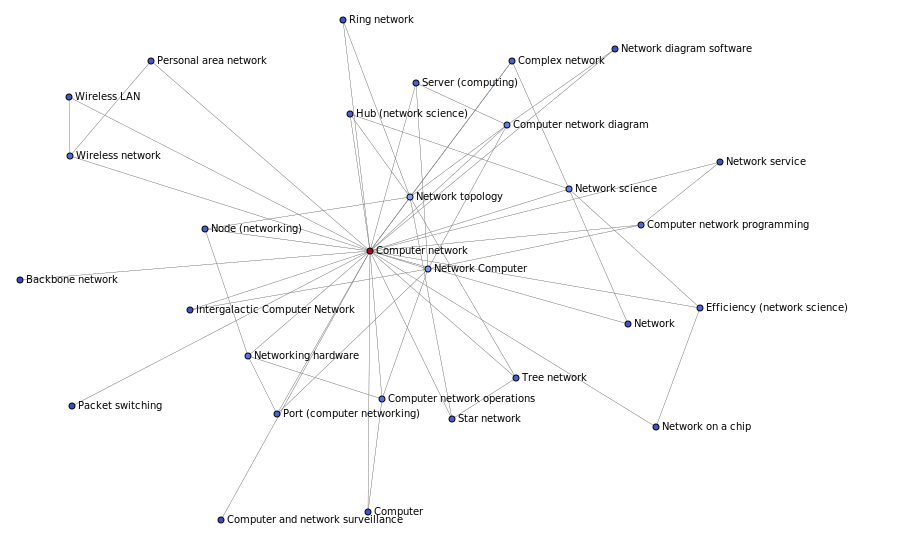

In [126]:
ego = top_nodes[1]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

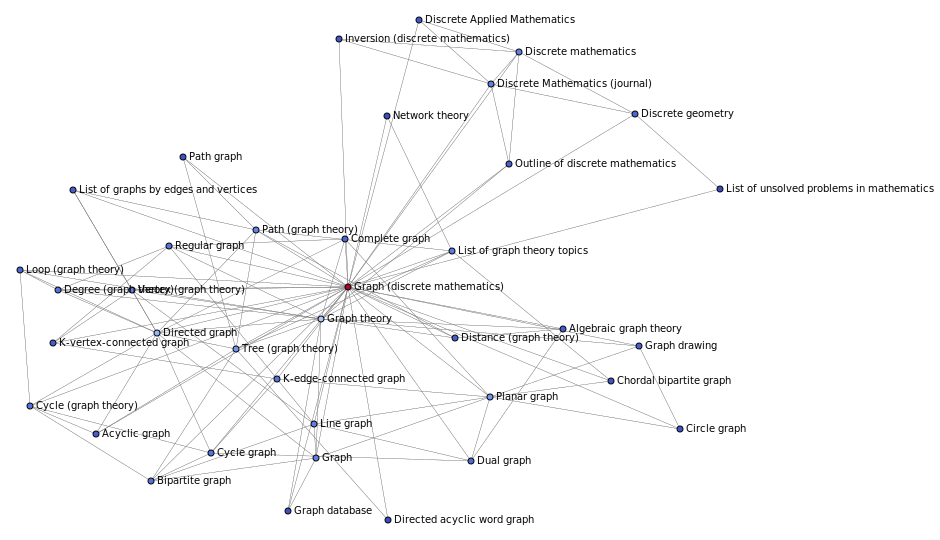

In [127]:
ego = top_nodes[2]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

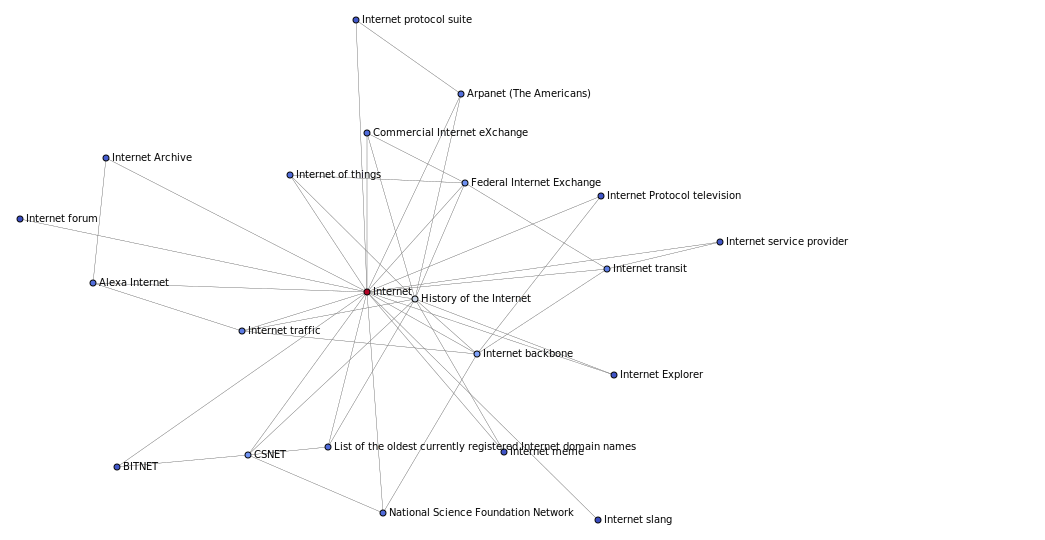

In [128]:
ego = top_nodes[3]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

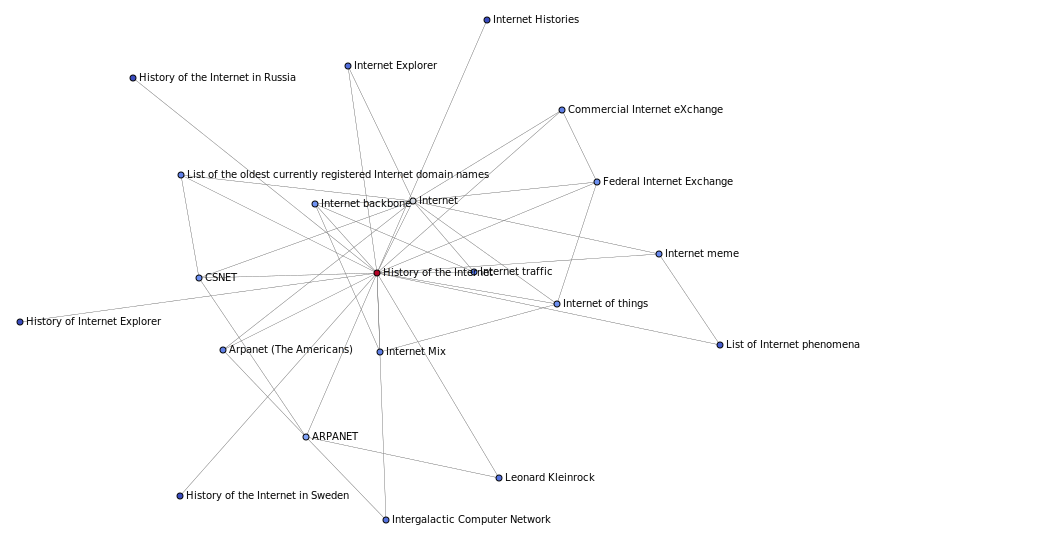

In [129]:
ego = top_nodes[4]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

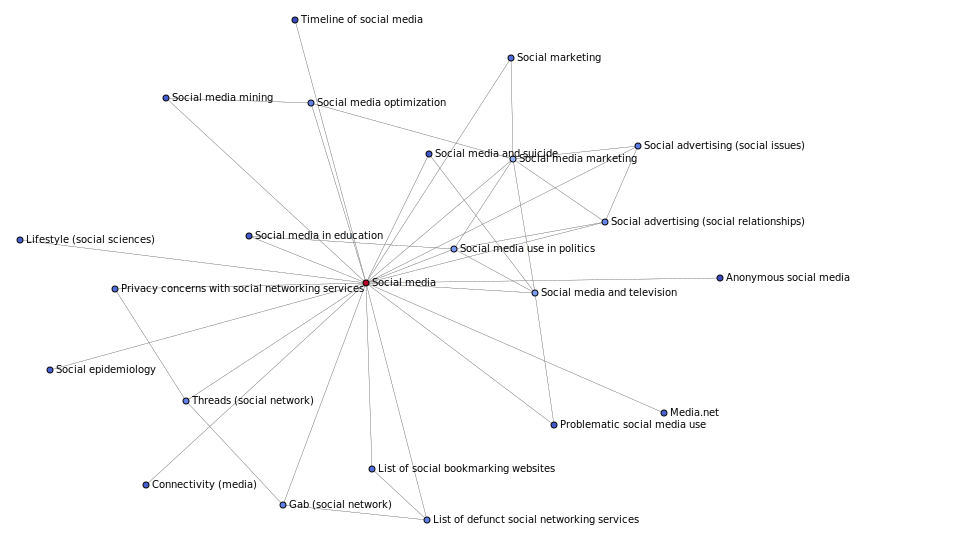

In [130]:
ego = top_nodes[5]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

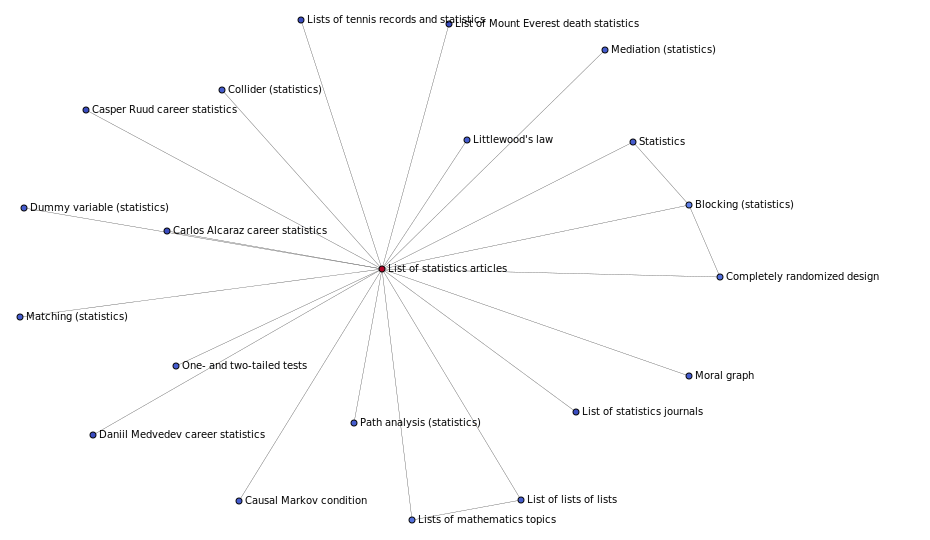

In [131]:
ego = top_nodes[6]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

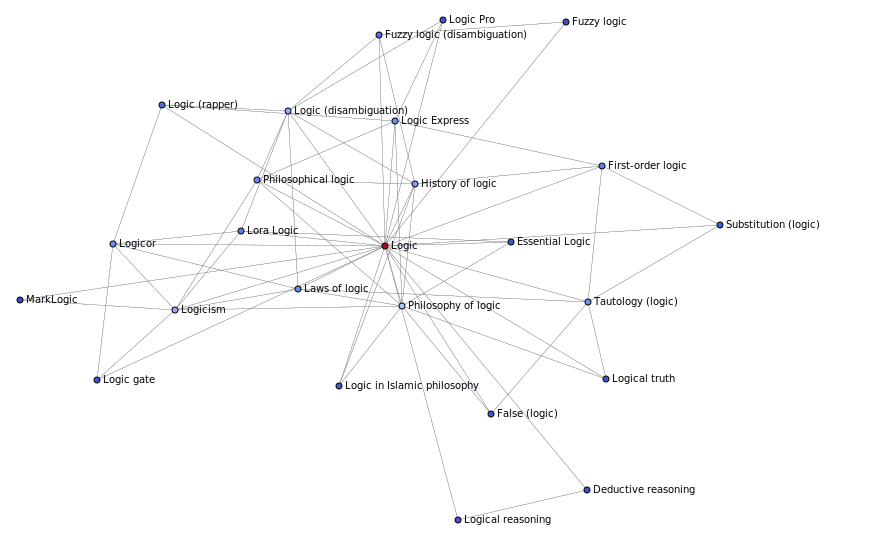

In [132]:
ego = top_nodes[7]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

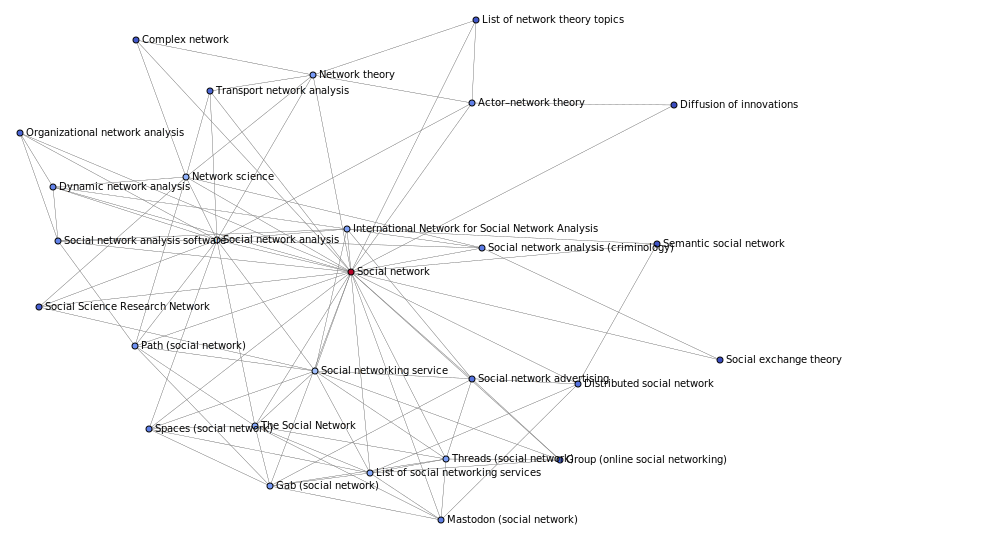

In [133]:
ego = top_nodes[8]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

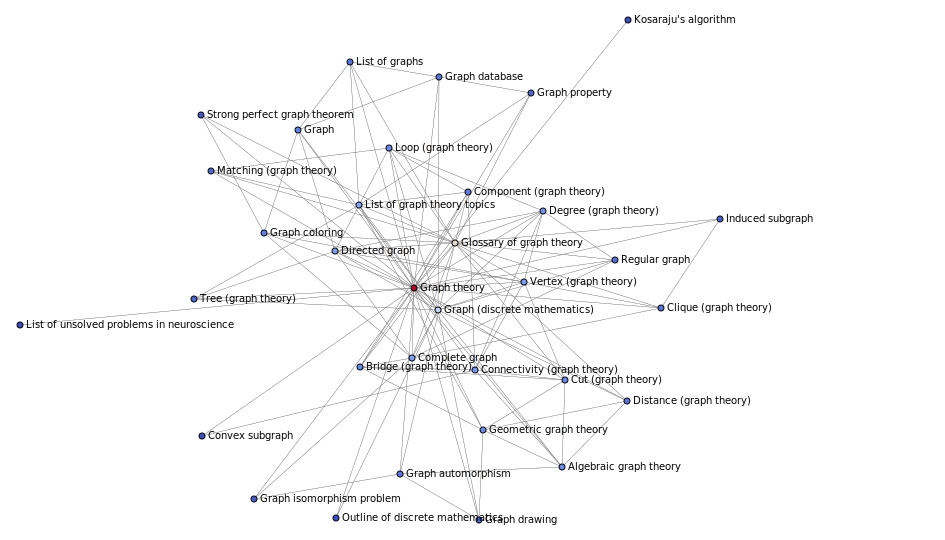

In [134]:
ego = top_nodes[9]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

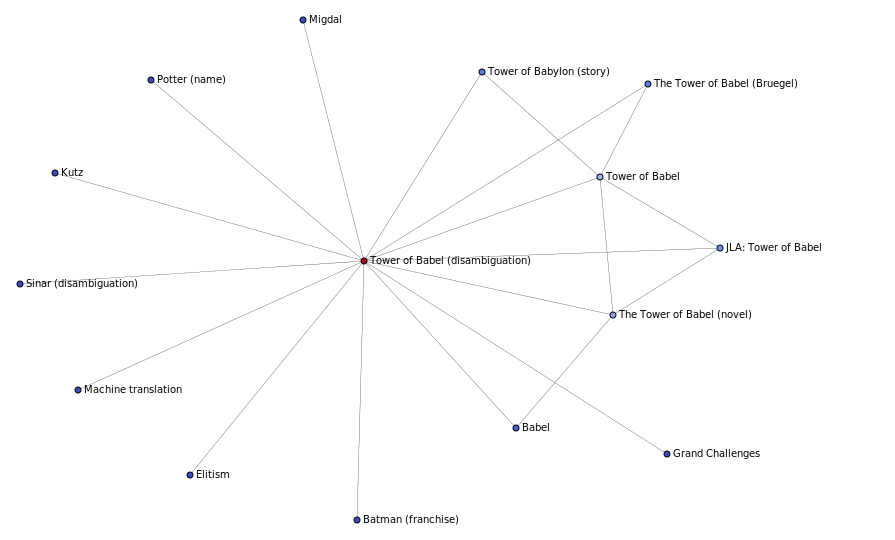

In [135]:
ego = top_nodes[10]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

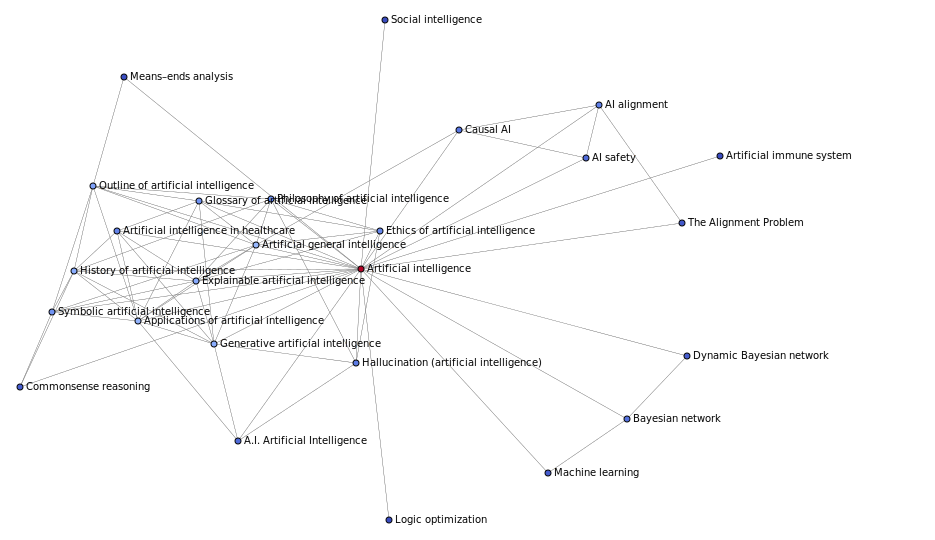

In [136]:
ego = top_nodes[11]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

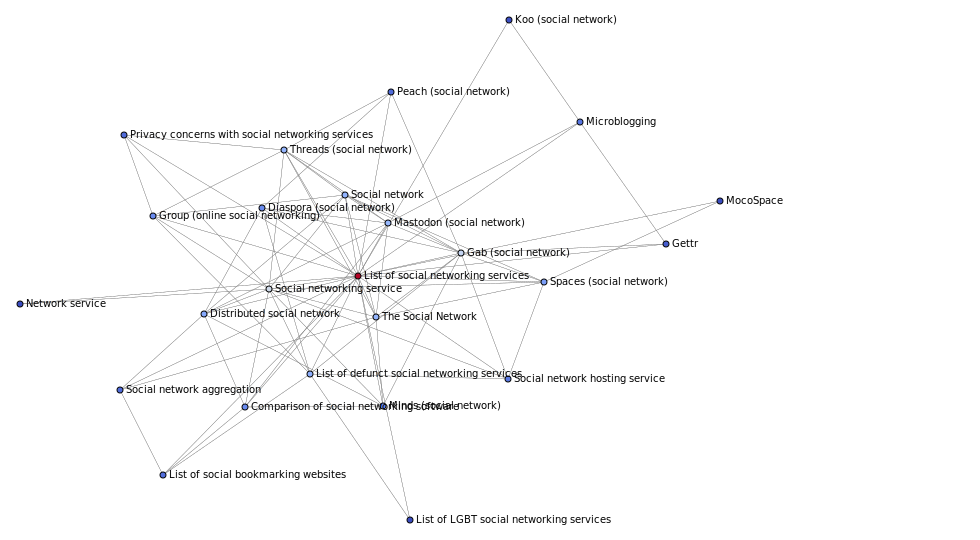

In [137]:
ego = top_nodes[12]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

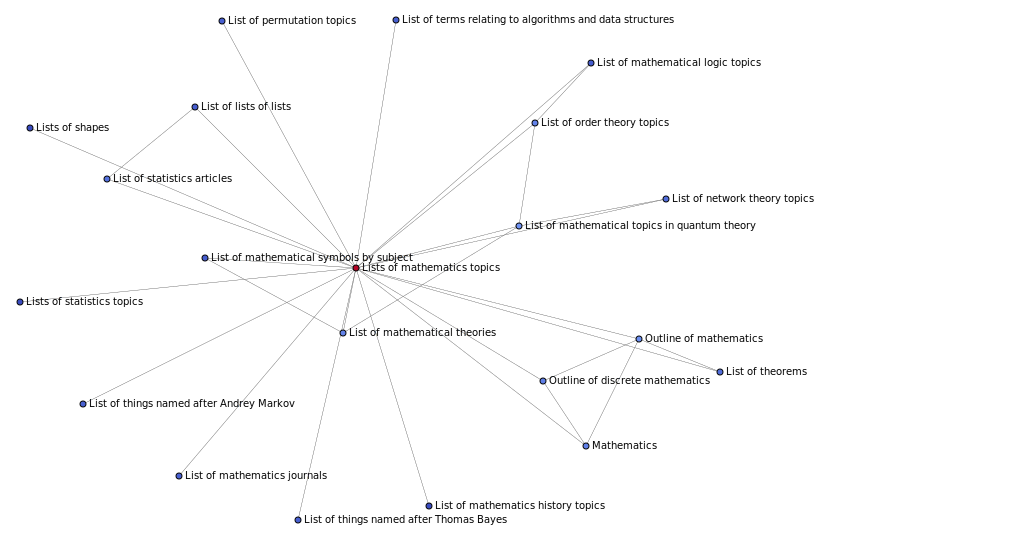

In [138]:
ego = top_nodes[13]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

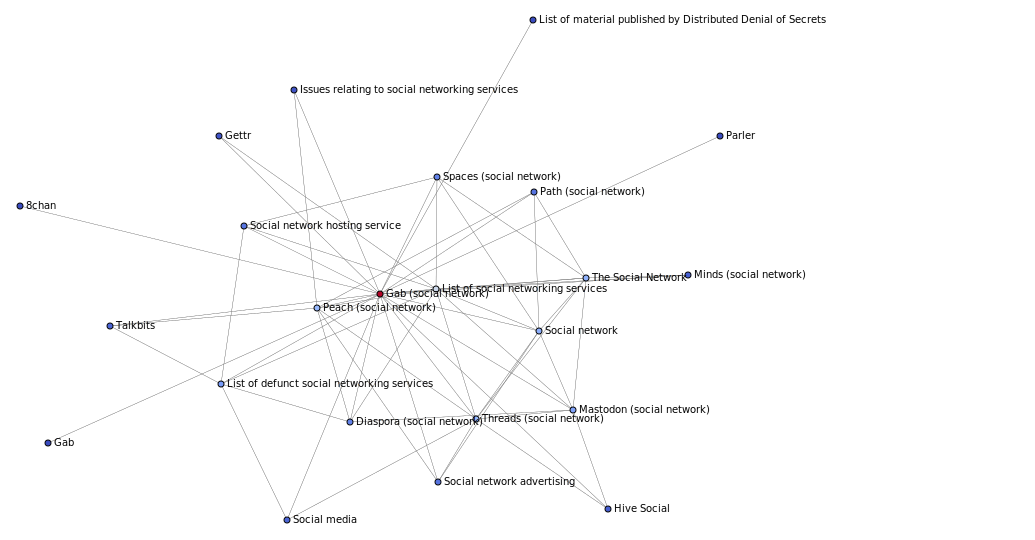

In [139]:
ego = top_nodes[14]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

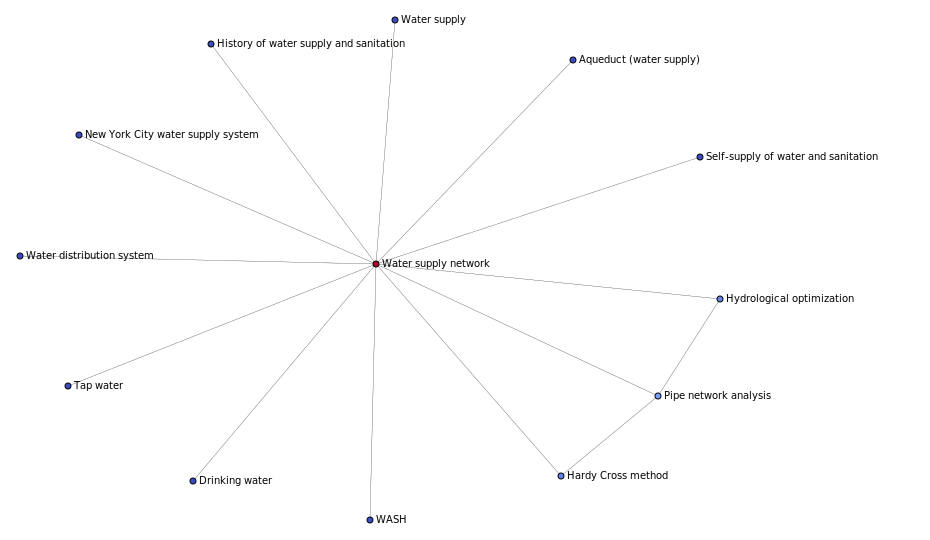

In [140]:
ego = top_nodes[15]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

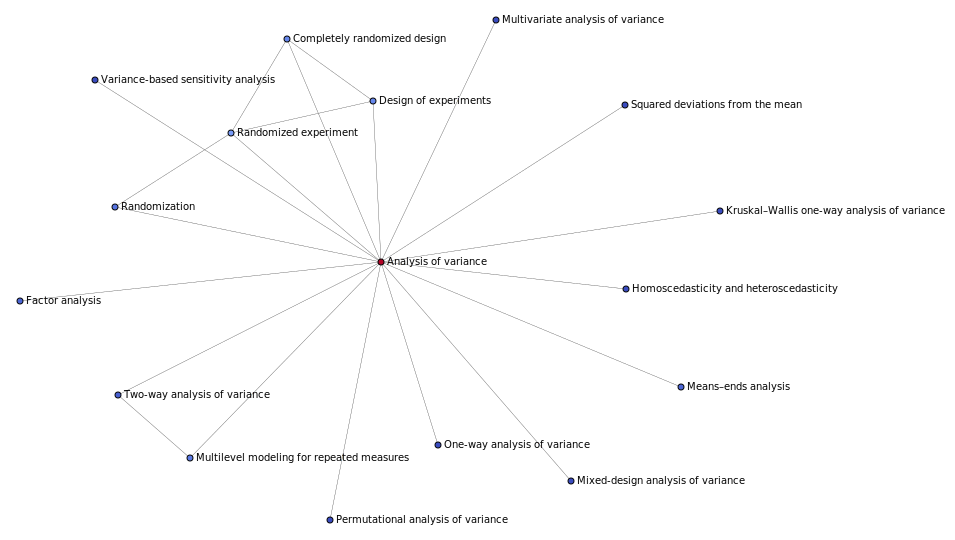

In [141]:
ego = top_nodes[16]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

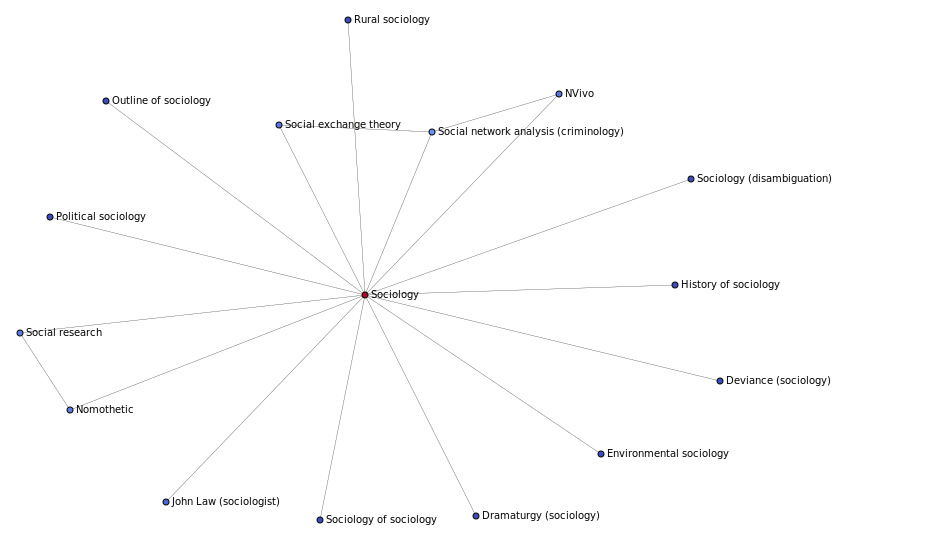

In [142]:
ego = top_nodes[17]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

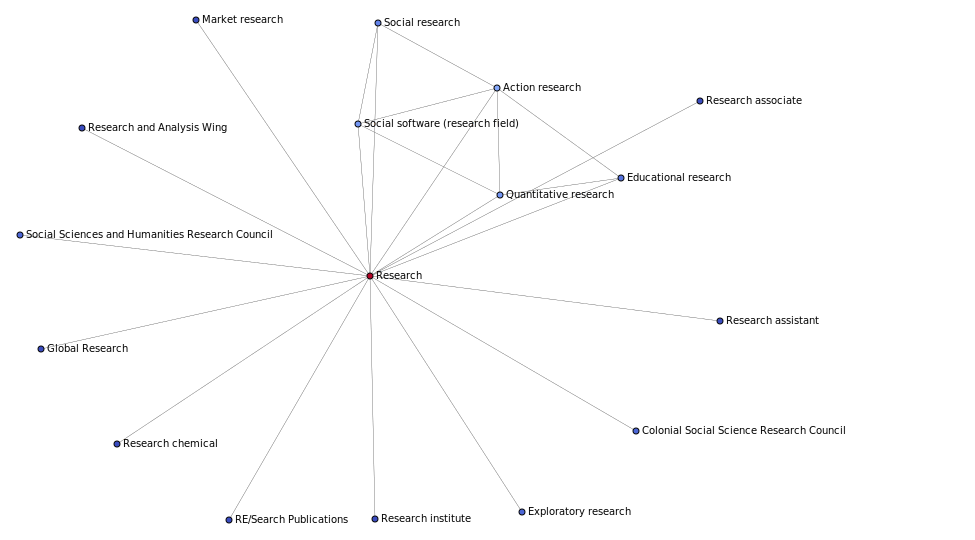

In [143]:
ego = top_nodes[18]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

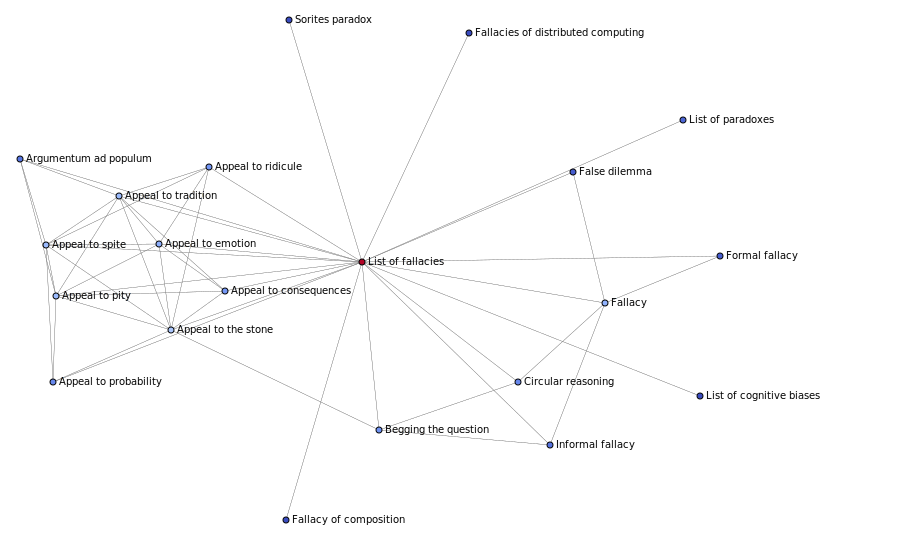

In [144]:
ego = top_nodes[19]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

# Next Steps

This is a very useful tool for learning. We started with just FOUR seed searches and ended up with a network of 9204 nodes and 14,140 edges. We will not be using the Les Miserables graph after this. This is much more interesting for annalysis, and we can use the Wikipedia crawler to investigate any topics of interest that we have.

Look closely at any of the ego networks that cover topics of interest to you. Then identify the alter nodes (the surrounding nodes). Use those to launch further research and education. Good luck!